In [10]:
!pip install pyedflib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 29.7 MB/s eta 0:00:00


In [13]:
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 37.3 MB/s eta 0:00:00


In [11]:
import pyedflib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
import mne

# Reading edf data:
data = mne.io.read_raw_edf('/content/drive/MyDrive/Colab Notebooks/laba/AG9.edf')
raw_data = data.get_data()
info = data.info
channels = data.ch_names
Fd = info['sfreq'] # Частота дискретизации
df = pd.DataFrame(data=raw_data.T,
            index=range(raw_data.shape[1]),
            columns=channels)

# Создание массива времени
Td = 1/Fd

Extracting EDF parameters from /content/drive/MyDrive/Colab Notebooks/laba/AG9.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [26]:
info

<Info | 8 non-empty values
 bads: []
 ch_names: ECG I, ECG II, ECG V1, ECG V2, ECG V3, ECG V4, ECG V5, ECG V6
 chs: 8 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: 2017-02-01 13:26:42 UTC
 nchan: 8
 projs: []
 sfreq: 500.0 Hz
 subject_info: 4 items (dict)
>

In [27]:
df

,ECG I,ECG II,ECG V1,ECG V2,ECG V3,ECG V4,ECG V5,ECG V6
0,-0.000175,-0.000171,0.000029,-0.000180,-0.001222,-0.000337,-0.000940,-0.002063
1,-0.000175,-0.000172,0.000029,-0.000184,-0.001225,-0.000339,-0.000944,-0.002093
2,-0.000173,-0.000173,0.000028,-0.000188,-0.001229,-0.000341,-0.000946,-0.002116
3,-0.000173,-0.000173,0.000027,-0.000191,-0.001231,-0.000344,-0.000947,-0.002136
4,-0.000173,-0.000175,0.000027,-0.000192,-0.001232,-0.000345,-0.000948,-0.002137
...,...,...,...,...,...,...,...,...
4995,0.000005,-0.000583,0.000346,-0.000044,-0.000608,-0.000093,-0.000593,-0.000850
4996,0.000008,-0.000579,0.000347,-0.000044,-0.000611,-0.000093,-0.000590,-0.000835
4997,0.000011,-0.000577,0.000346,-0.000042,-0.000612,-0.000091,-0.000587,-0.000812
4998,0.000012,-0.000578,0.000348,-0.000037,-0.000610,-0.000089,-0.000581,-0.000782


In [28]:
d1 = np.array(df['ECG I'])
t = []
for i in range(d1.shape[0]):
    t.append(Td*i)
t = np.array(t)

In [29]:
# Шаг дискретизации
Td

0.002

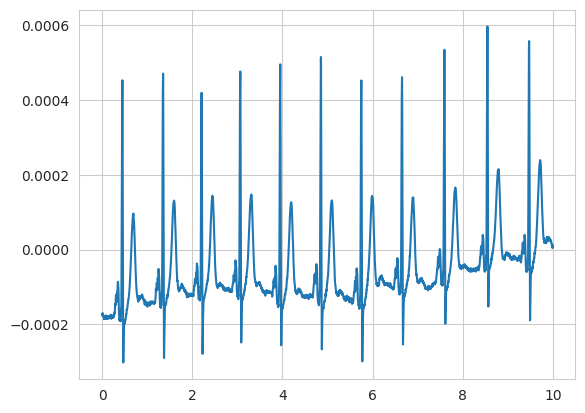

In [30]:
plt.plot(t,d1)

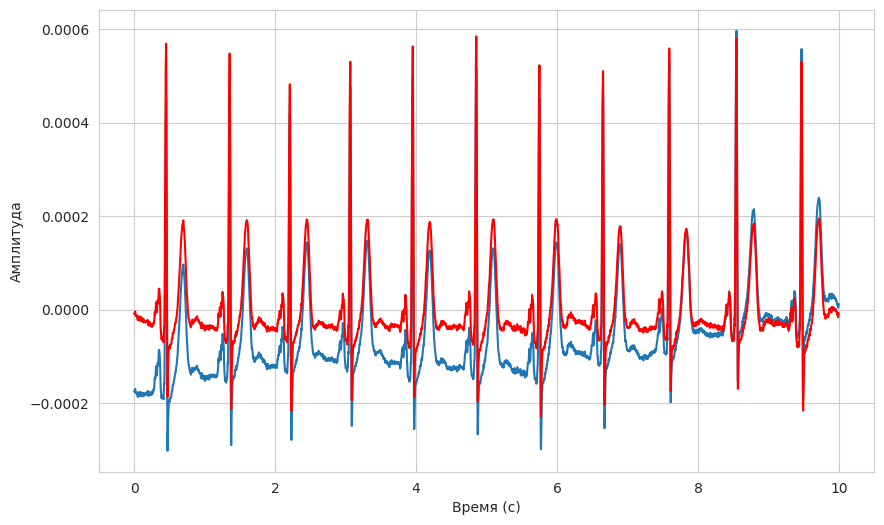

In [31]:
import scipy.signal as signal

# Parameters
fs = 500  # Частота дискретизации, Гц
cutoff_freq = 0.6  # Частота среза, Гц
order = 1  # Порядок фильтра

# Butterworth filter
nyquist_freq = 0.5 * fs  # Частота Найквиста (половина частоты дискретизации)
normalized_cutoff = cutoff_freq / nyquist_freq  # Нормализованная частота среза

# Getting filter coefficients (b - numerator, a - denominator of transfer function)
b, a = signal.butter(order, normalized_cutoff, btype='high', analog=False)

# Applying the filter
filtered_d1 = signal.filtfilt(b, a, d1)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(t, d1, label='Исходный сигнал d1')
plt.plot(t, filtered_d1, label='Отфильтрованный сигнал d1', color='red')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.show()


In [32]:
d2 = np.array(df['ECG II'])
v1 = np.array(df['ECG V1'])
v2 = np.array(df['ECG V2'])
v3 = np.array(df['ECG V3'])
v4 = np.array(df['ECG V4'])
v5 = np.array(df['ECG V5'])
v6 = np.array(df['ECG V6'])

In [33]:
filtered_d2 = signal.filtfilt(b, a, d2)
filtered_v1 = signal.filtfilt(b, a, v1)
filtered_v2 = signal.filtfilt(b, a, v2)
filtered_v3 = signal.filtfilt(b, a, v3)
filtered_v4 = signal.filtfilt(b, a, v4)
filtered_v5 = signal.filtfilt(b, a, v5)
filtered_v6 = signal.filtfilt(b, a, v6)

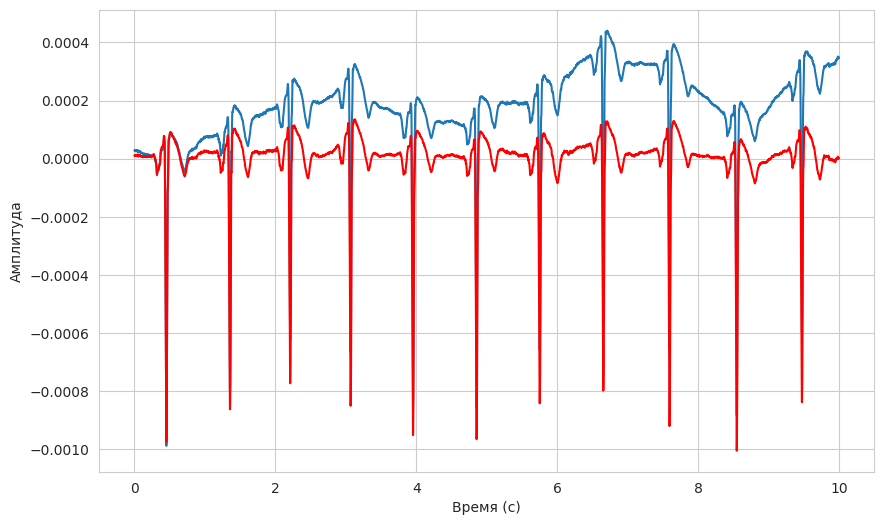

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(t, v1, label='Исходный сигнал v1')
plt.plot(t, filtered_v1, label='Отфильтрованный сигнал v1', color='red')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.show()

In [2]:
pip install neurokit2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.1/693.1 kB 9.8 MB/s eta 0:00:00


In [3]:
import neurokit2 as nk

In [38]:
nk.ecg_peaks(filtered_d1, Fd)

(      ECG_R_Peaks
 0               0
 1               0
 2               0
 3               0
 4               0
 ...           ...
 4995            0
 4996            0
 4997            0
 4998            0
 4999            0
 
 [5000 rows x 1 columns],
 {'method_peaks': 'neurokit',
  'method_fixpeaks': 'None',
  'ECG_R_Peaks': array([ 226,  677, 1104, 1533, 1976, 2427, 2875, 3326, 3796, 4273, 4735]),
  'sampling_rate': 500.0})

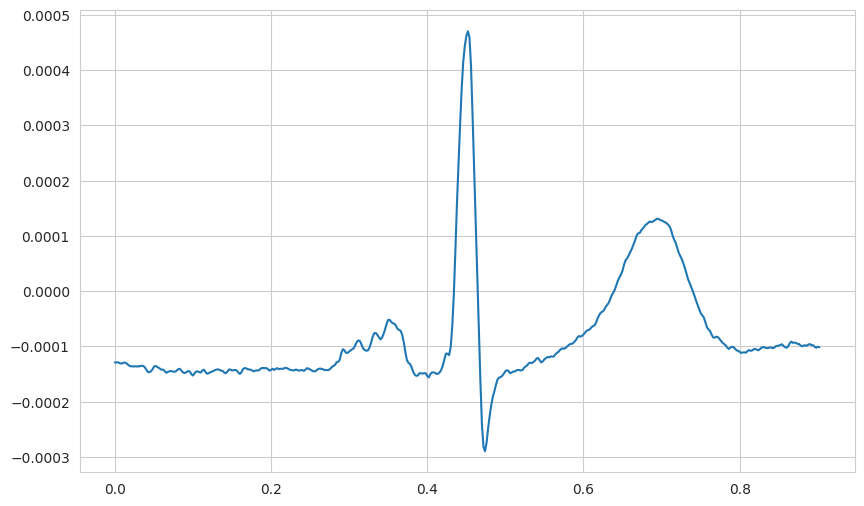

In [42]:
# Searching for 1 period
smth1, smth2 = nk.ecg_peaks(filtered_d1, Fd)
peaks = smth2['ECG_R_Peaks']
delta = round((peaks[1] - peaks[0])/2)
cicle_d1 = d1[peaks[1]-delta:peaks[1]+delta]
plt.figure(figsize=(10, 6))
plt.plot(t[:np.size(cicle_d1)], cicle_d1)
plt.show()

In [48]:
sig = np.column_stack((filtered_d1, filtered_d2, filtered_v1, filtered_v2, filtered_v3, filtered_v4, filtered_v5, filtered_v6))

In [49]:
sig.shape

(5000, 8)

In [50]:
# Cutting the array to get 1 period
sig = sig[peaks[1]-delta:peaks[1]+delta, :]
sig.shape

(452, 8)

In [51]:
# Computation of VECG
x = np.zeros((sig.shape[0], 1))
y = np.zeros((sig.shape[0], 1))
z = np.zeros((sig.shape[0], 1))
for i in range (sig.shape[0]):
    x[i] = 0.172*sig[i,2] + 0.074*sig[i,3] - 0.122*sig[i,4] - 0.231*sig[i,5] - 0.239*sig[i,6] - 0.194*sig[i,7] \
    - 0.156*sig[i,0] + 0.01*sig[i,1]
    y[i] = 0.057*sig[i,2] - 0.019*sig[i,3] - 0.106*sig[i,4] - 0.022*sig[i,5] + 0.041*sig[i,6] + 0.048*sig[i,7] \
    - 0.227*sig[i,0] + 0.887*sig[i,1]
    z[i] = 0.229*sig[i,2] + 0.31*sig[i,3] + 0.246*sig[i,4] + 0.063*sig[i,5] - 0.055*sig[i,6] - 0.108*sig[i,7] \
    - 0.022*sig[i,0] - 0.102*sig[i,1]

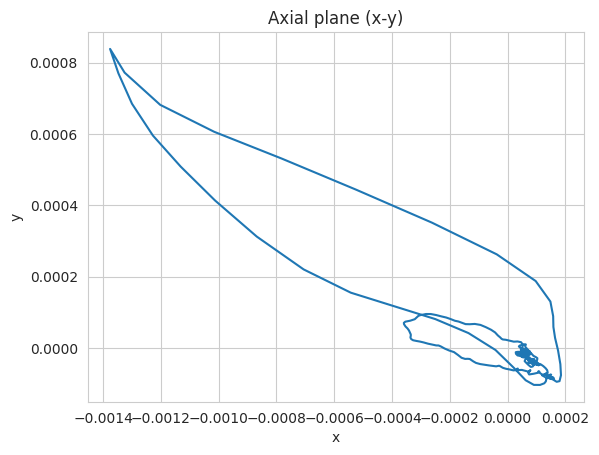

In [52]:
plt.plot(x, y)
plt.title('Axial plane (x-y)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

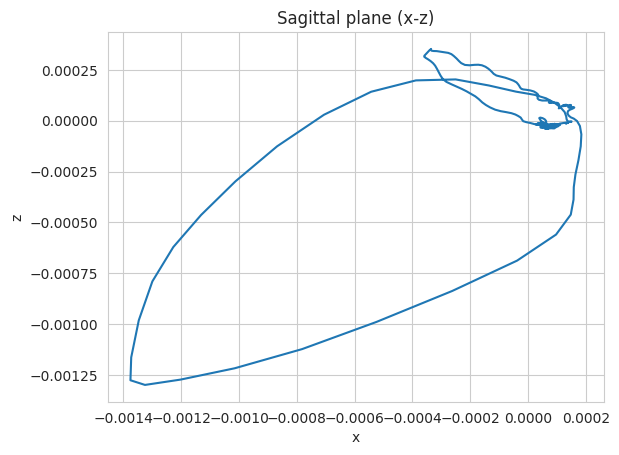

In [53]:
plt.plot(x, z)
plt.title('Sagittal plane (x-z)')
plt.xlabel('x')
plt.ylabel('z')
plt.show()

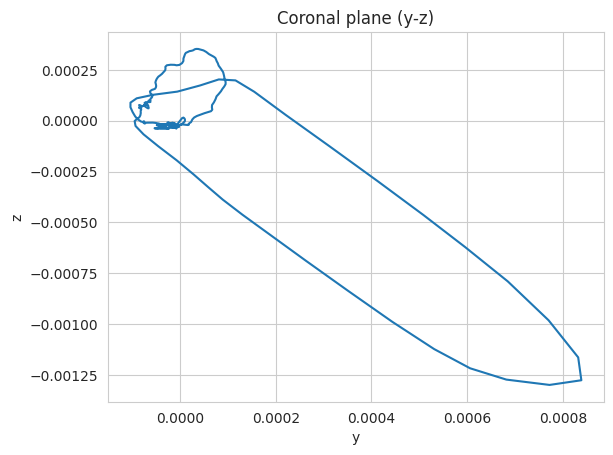

In [54]:
plt.plot(y, z)
plt.title('Coronal plane (y-z)')
plt.xlabel('y')
plt.ylabel('z')
plt.show()

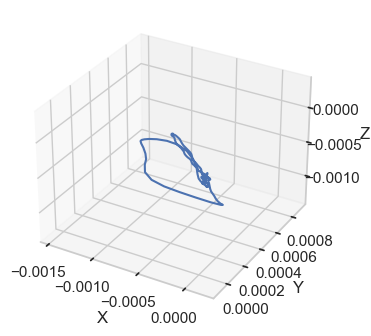

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.ion()
plt.show()
plt.pause(60)
plt.close()

In [ ]:
# import matplotlib
# matplotlib.use('Qt5Agg')
# import matplotlib.pyplot as plt

In [ ]:
# pip install PyQt5

Note: you may need to restart the kernel to use updated packages.
